In [1]:
import sys
sys.path.append('/content/drive/MyDrive/Colab_Notebooks/Kolbenkraft/cat_noncat/')
from utils import *
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_x_orig, train_y, test_x_orig, test_y, classes = load_data()

In [3]:
train_x_orig = train_x_orig/255
test_x_orig = test_x_orig/255

In [4]:
print("Shape of training set: {}".format(train_x_orig.shape))

Shape of training set: (209, 64, 64, 3)


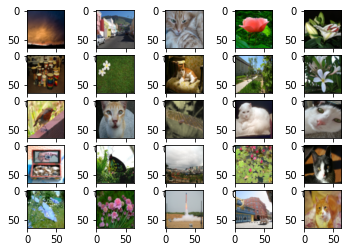

In [5]:
f, grid = plt.subplots(5,5)
index = 0
for i in range(5):
  for j in range(5):
    grid[i,j].imshow(train_x_orig[index])
    index += 1

<BarContainer object of 25 artists>

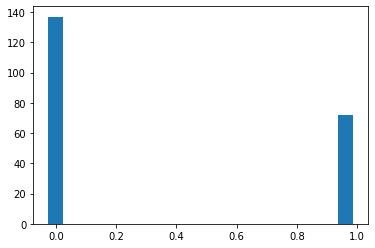

In [6]:
num_bins = 25
hist, bins = np.histogram(train_y, num_bins)
plt.bar(bins[:-1], hist, width=0.05)

In [7]:
train_x = train_x_orig.reshape(train_x_orig.shape[0], -1).T
test_x = test_x_orig.reshape(test_x_orig.shape[0],-1).T

print("Training data reshaped: {}".format(train_x.shape))

Training data reshaped: (12288, 209)


In [8]:
def initialize_params(layer_dims):
  params = {}
  for i in range(1,len(layer_dims)):
    params['W'+str(i)] = np.random.randn(layer_dims[i], layer_dims[i-1])/np.sqrt(layer_dims[i-1])
    params['b'+str(i)] = np.zeros((layer_dims[i], 1)) 
  return params

In [9]:
layer_dims = (train_x.shape[0], 124,64,1)
params = initialize_params(layer_dims)

In [10]:
print(params.keys())

dict_keys(['W1', 'b1', 'W2', 'b2', 'W3', 'b3'])


In [11]:
def linear_activation_forward(A_prev, W, b, activation):
    z = np.dot(W,A_prev) + b
    if activation == 'relu':
      A = relu(z)
    elif activation == 'sigmoid':
      A = sigmoid(z)
    linear_cache = (A_prev, W,b)
    activation_cache = z
    cache = (linear_cache, activation_cache)
    return A, cache

In [12]:
def forward_propagation(train_x, params):
  caches = []
  A = train_x
  l = int(len(params)/2)
  for i in range(1,l):
    A_prev = A
    A, cache = linear_activation_forward(A_prev, params['W'+str(i)], params['b'+str(i)], 'relu')
    caches.append(cache)
  Al, cache = linear_activation_forward(A, params['W'+str(l)], params['b'+str(l)], 'sigmoid')
  caches.append(cache)
  return Al, caches

In [13]:
def calculate_cost(AL,Y):
  m = Y.shape[1]
  loss = (-1/m)*(np.sum(np.multiply(Y, np.log(AL))+np.multiply(1-Y, np.log(1-AL))))
  return loss

In [14]:
def linear_backward(dZ, cache):
  A_prev, W, b = cache
  m = A_prev.shape[1]
  dW = np.dot(dZ, A_prev.T)/m
  db = np.sum(dZ, axis = 1, keepdims=True)/m
  dA_prev = np.dot(W.T, dZ)
  
  assert (dA_prev.shape == A_prev.shape)
  assert (dW.shape == W.shape)
  assert (db.shape == b.shape)

  return dA_prev, dW, db

In [15]:
def linear_activation_backward(dA, cache, activation):

  linear_cache, activation_cache = cache
  if activation == "sigmoid":
    dZ = sigmoid_backward(dA, activation_cache)
  
  elif activation  == "relu":
    dZ = relu_backward(dA, activation_cache)
  
  dA_prev, dW, db = linear_backward(dZ, linear_cache)

  return dA_prev, dW, db

In [16]:
def back_propagation(AL, Y, caches):
  m = AL.shape[1]
  L = len(caches)
  grads = {}

  dAL = -(np.divide(Y,AL)-np.divide(1-Y,1-AL)) 
  current_cache = caches[L-1]
  grads["dA"+str(L-1)], grads["dW"+str(L)], grads["db"+str(L)] = linear_activation_backward(dAL, current_cache,"sigmoid")

  for l in reversed(range(L-1)):
    current_cache = caches[l]
    dA_prev, dW, db = linear_activation_backward(grads['dA'+str(l+1)], current_cache, "relu")
    grads['dA'+str(l)] = dA_prev
    grads["dW"+str(l+1)] = dW
    grads["db"+str(l+1)] = db

  return grads

In [17]:
 AL, caches = forward_propagation(train_x, params)

In [18]:
def update_params(parameters,grads,alpha):
  L = int(len(parameters)/2)
  for l in range(L):
    parameters["W"+str(l+1)] -= alpha*grads["dW"+str(l+1)]
    parameters["b"+str(l+1)] -= alpha*grads["db"+str(l+1)]
  return parameters

In [19]:
def model(train_x, train_y, layer_dims,iter, alpha):

  params = initialize_params(layer_dims)
  
  for i in range(iter):
    AL, caches = forward_propagation(train_x, params)
    loss = calculate_cost(AL, train_y)
    if i%100==0:
      print("Cost after {} iterations: {}".format(i, loss))
    grads =  back_propagation(AL, train_y, caches)
    params = update_params(params, grads, alpha)
  
  return params

In [20]:
parameters = model(train_x, train_y, layer_dims, 1500, 0.01)

Cost after 0 iterations: 0.757429590186963
Cost after 100 iterations: 0.5561307440034975
Cost after 200 iterations: 0.5057546597560705
Cost after 300 iterations: 0.46936786899115673
Cost after 400 iterations: 0.43577127158927526
Cost after 500 iterations: 0.40336868906410583
Cost after 600 iterations: 0.3762648203540785
Cost after 700 iterations: 0.3570332135044452
Cost after 800 iterations: 0.347642370080238
Cost after 900 iterations: 0.32569328471874315
Cost after 1000 iterations: 0.2729903656032192
Cost after 1100 iterations: 0.1894972300331962
Cost after 1200 iterations: 0.15852679535958875
Cost after 1300 iterations: 0.12793334323597194
Cost after 1400 iterations: 0.11421785745468316


In [24]:
def predict(X, y, parameters):
    m = X.shape[1]
    p = np.zeros((1,m))
    prediction, caches = forward_propagation(X, parameters)
    for i in range(prediction.shape[1]):
      if prediction[0,i] >= 0.3:
        p[0,i] = 1
      else:
        p[0,i] = 0
    acc = np.sum(p==y)/m
    return p, acc

In [25]:
training_res, training_acc = predict(train_x, train_y, parameters)
test_res, test_acc = predict(test_x, test_y, parameters)

print("Training accuracy: ", training_acc)
print("Test accuracy: ", test_acc)

Training accuracy:  0.9665071770334929
Test accuracy:  0.72


The image is not of cat.


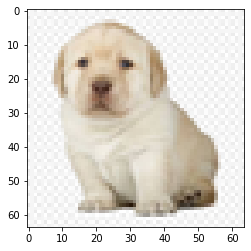

In [32]:
from PIL import Image
num_px = 64
fileImage = Image.open("dog.png").convert("RGB").resize([num_px,num_px],Image.ANTIALIAS)
my_label_y = [1] # the true class of your image (1 -> cat, 0 -> non-cat)

image = np.array(fileImage)
my_image = image.reshape(num_px*num_px*3,1)
my_image = my_image/255.
my_predicted_image, accuracy = predict(my_image, my_label_y, parameters)
plt.imshow(image)

if my_predicted_image == 1:
  print('The image is of a cat.')
else:
  print('The image is not of cat.')

The image is of a cat.


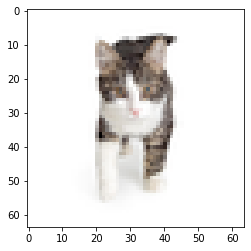

In [36]:
num_px = 64
fileImage = Image.open("cat.png").convert("RGB").resize([num_px,num_px],Image.ANTIALIAS)
my_label_y = [1] # the true class of your image (1 -> cat, 0 -> non-cat)

image = np.array(fileImage)
my_image = image.reshape(num_px*num_px*3,1)
my_image = my_image/255.
my_predicted_image, accuracy = predict(my_image, my_label_y, parameters)
plt.imshow(image)

if my_predicted_image == 1:
  print('The image is of a cat.')
else:
  print('The image is not of cat.')